In [41]:
#from sage.all import *
import warnings
warnings.filterwarnings("ignore", message=".*Signature.*numpy.longdouble.*")
#da ni warningov


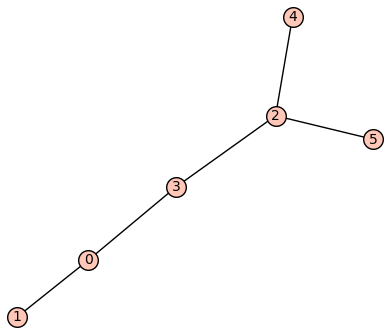

In [42]:
graphs.RandomTree(6).show()

In [43]:
#import random

def general_sombor_index(G, alpha):
    deg = G.degree()  
    val = 0
    for u, v in G.edges(labels=False):
        du = deg[u]
        dv = deg[v]
        val += (du**2 + dv**2)**alpha
    return RR(val)

def max_degree(G):
    return max(G.degree()) if G.num_verts() > 0 else 0


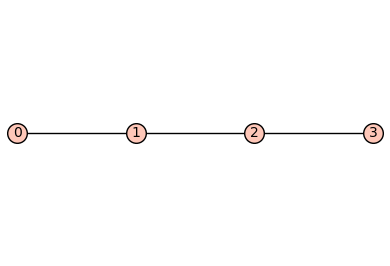

vozlišča: [0, 1, 2, 3]
povezave: [(0, 1), (1, 2), (2, 3)]
stopnje: [1, 2, 2, 1]
  α = 0.10  →  SO_α(G) = 3.58038229952095
  α = 0.50  →  SO_α(G) = 7.30056307974577
  α = 0.90  →  SO_α(G) = 15.0114183960577


In [44]:
#testiranje na primeru
G = graphs.PathGraph(4)
G.show()

print("vozlišča:", G.vertices())
print("povezave:", G.edges(labels=False))
print("stopnje:", G.degree())

alpha_values = [0.1, 0.5, 0.9]

for alpha in alpha_values:
    val = general_sombor_index(G, alpha)
    print(f"  α = {alpha:.2f}  →  SO_α(G) = {val}")


In [45]:
def systematic_best_trees(n, Delta, alpha, return_all_best=True):
    best_val = -infinity
    best_trees = []
    
    for T in graphs.trees(n):
        if max_degree(T) > Delta:
            continue
        
        val = general_sombor_index(T, alpha)
        if val > best_val + 1e-12:
            best_val = val
            best_trees = [T]
        elif abs(val - best_val) <= 1e-12 and return_all_best:
            best_trees.append(T)
    
    return best_val, best_trees

SO_1.00(G) = 114.000000000000

Ekstremi: 

Drevo 1:
stopnje vozlišč: [1, 1, 1, 1, 1, 1, 3, 3, 3, 3]
max stopnja: 3
povezave: [(0, 1), (0, 6), (0, 9), (1, 2), (1, 5), (2, 3), (2, 4), (6, 7), (6, 8)]


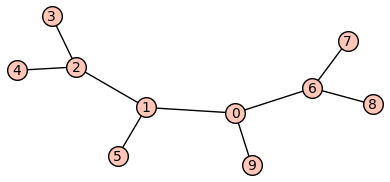

Drevo 2:
stopnje vozlišč: [1, 1, 1, 1, 1, 1, 3, 3, 3, 3]
max stopnja: 3
povezave: [(0, 1), (0, 4), (0, 7), (1, 2), (1, 3), (4, 5), (4, 6), (7, 8), (7, 9)]


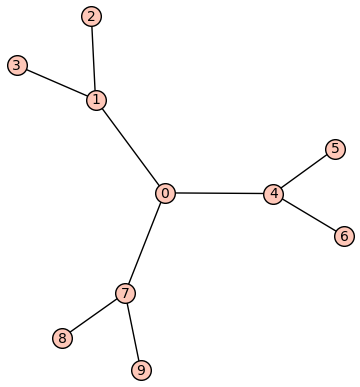

In [46]:
#testiranje na primeru
n = 10    
Delta = 3    
alpha = 1  

best_val, best_trees = systematic_best_trees(n, Delta, alpha)

print(f"SO_{alpha:.2f}(G) = {best_val}\n")

print("Ekstremi: \n")
for i, T in enumerate(best_trees, 1):
    print(f"Drevo {i}:")
    print("stopnje vozlišč:", sorted(T.degree()))
    print("max stopnja:", max_degree(T))
    print("povezave:", T.edges(labels=False))
    T.show()  
